<a href="https://colab.research.google.com/github/RohanRajendraDalvi/violentImageDetection/blob/main/voilence_image_blur___image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group 2 - Voilence Image detection and blurring

# 14_Anshu Bhagat
# 30_Rohan Dalvi
# 31_Shreyash Damania
# 40_Shivam Dubey

# Download the dataset

In [ ]:
!gdown --id 1f5fuqJQ2HlWocGI0olaP-fuiJu6pB-MQ

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1f5fuqJQ2HlWocGI0olaP-fuiJu6pB-MQ
To: /content/violence.zip
100% 80.7M/80.7M [00:00<00:00, 168MB/s]


In [ ]:
!unzip violence.zip

Archive:  violence.zip
  inflating: dataset/train/safe/0418_STD_SocialGathering_Feature.jpg  
  inflating: dataset/train/safe/0418_STD_Social_Gathering_eating_FINAL.jpg  
  inflating: dataset/train/safe/0419_friends.jpg  
  inflating: dataset/train/safe/0baa9dd35182189209e9643fab39446a.jpg  
  inflating: dataset/train/safe/1084211.jpg  
  inflating: dataset/train/safe/11334246661594378123.jpg  
  inflating: dataset/train/safe/1274249.jpg  
  inflating: dataset/train/safe/31289973-social-gathering.jpg  
  inflating: dataset/train/safe/360_F_322842284_n6FhwDccKnbSQgqa5qVKVyK8lDCpw5ka.jpg  
  inflating: dataset/train/safe/49152357-group-of-casual-people-social-gathering-concept.jpg  
  inflating: dataset/train/safe/49326522-group-of-casual-people-social-gathering-concept.jpg  
  inflating: dataset/train/safe/4bf4a4c4-5faf-42bf-bbfb-0f62ad72d78d-_Covid_Tests_UTK_108882_.jpg  
  inflating: dataset/train/safe/59261099-beer-cheers-party-celebration-social-gathering-concept.jpg  
  inflating: 

In [ ]:
import os
dir_path = '/content/dataset/'

count = 0
for root_dir, cur_dir, files in os.walk(dir_path):
    count += len(files)
print('File count:', count)

# os.listdir('/content/dataset/train/safe')

File count: 866


# 1. Install Dependencies and Setup

In [ ]:
import tensorflow as tf
import os

import cv2
from google.colab.patches import cv2_imshow

from google.colab import files
from IPython.display import Image, display

# 2. Remove dodgy images

In [ ]:
import cv2
import imghdr

In [ ]:
data_dir = '/content/dataset/train' 

In [ ]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [ ]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('/content/dataset/train')

Found 677 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

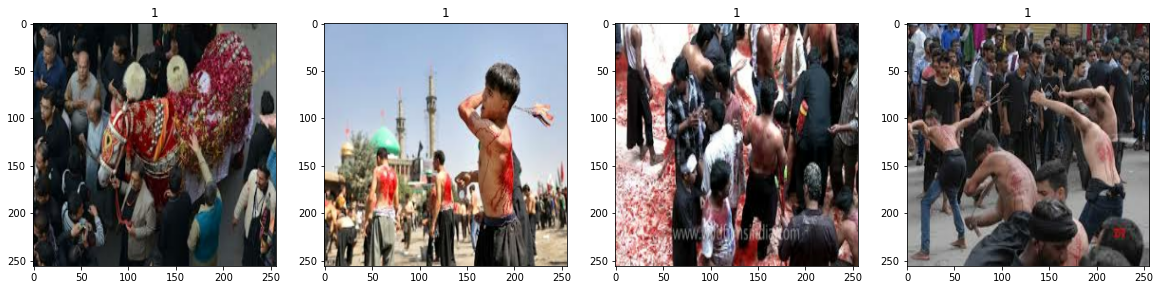

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [ ]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
data.as_numpy_iterator().next()

(array([[[[0.9721124 , 0.8906327 , 0.9256357 ],
          [0.9581648 , 0.90501684, 0.9307215 ],
          [0.9314338 , 0.9323223 , 0.9411765 ],
          ...,
          [0.11691942, 0.135072  , 0.14829198],
          [0.11764706, 0.13725491, 0.14901961],
          [0.11764706, 0.13725491, 0.14901961]],
 
         [[0.9674575 , 0.8883052 , 0.92330825],
          [0.94868845, 0.9000288 , 0.9254836 ],
          [0.91838515, 0.92292917, 0.9299556 ],
          ...,
          [0.13445646, 0.15344183, 0.16807318],
          [0.13560049, 0.15520833, 0.16722287],
          [0.13560049, 0.15520833, 0.16913393]],
 
         [[0.96956605, 0.8954894 , 0.9293665 ],
          [0.94560766, 0.90242934, 0.92669684],
          [0.9082143 , 0.9168254 , 0.92227674],
          ...,
          [0.15903243, 0.17864028, 0.19432656],
          [0.15927823, 0.18188779, 0.19408907],
          [0.15915288, 0.18105434, 0.19876337]],
 
         ...,
 
         [[0.80784315, 0.80784315, 0.7764706 ],
          [0.80784

# 5. Split Data

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [ ]:
train_size

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# 7. Train

In [ ]:
logdir = 'logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
15/15 [==============================] - 37s 2s/step - loss: 0.7550 - accuracy: 0.5396 - val_loss: 0.6545 - val_accuracy: 0.5156
Epoch 2/10
15/15 [==============================] - 35s 2s/step - loss: 0.6142 - accuracy: 0.5813 - val_loss: 0.6192 - val_accuracy: 0.6641
Epoch 3/10
15/15 [==============================] - 35s 2s/step - loss: 0.5011 - accuracy: 0.7563 - val_loss: 0.7181 - val_accuracy: 0.6328
Epoch 4/10
15/15 [==============================] - 35s 2s/step - loss: 0.4300 - accuracy: 0.8188 - val_loss: 0.3966 - val_accuracy: 0.8125
Epoch 5/10
15/15 [==============================] - 34s 2s/step - loss: 0.3210 - accuracy: 0.8708 - val_loss: 0.2125 - val_accuracy: 0.9531
Epoch 6/10
15/15 [==============================] - 36s 2s/step - loss: 0.2880 - accuracy: 0.8958 - val_loss: 0.2793 - val_accuracy: 0.9297
Epoch 7/10
15/15 [==============================] - 35s 2s/step - loss: 0.2363 - accuracy: 0.9125 - val_loss: 0.2387 - val_accuracy: 0.9453
Epoch 8/10
15/15 [==

# 8. Plot Performance

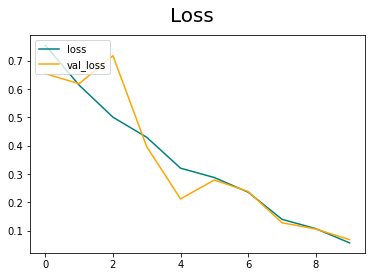

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

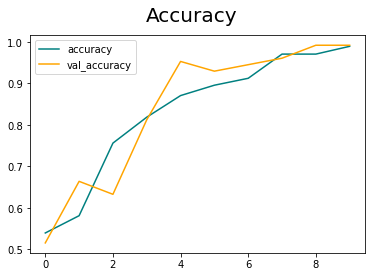

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 1s 527ms/step


In [ ]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.9512195, shape=(), dtype=float32) tf.Tensor(0.96875, shape=(), dtype=float32)


save the model

In [ ]:
import os.path
if os.path.isfile('models/anshu_model.h5') is False:
  model.save('models/anshu_model.h5')

load the model

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('models/anshu_model.h5')

# Predict

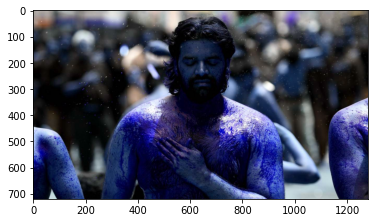

In [ ]:
img = cv2.imread('/content/dataset/val/unsafe/734088-21afp-afp19a9ow.jpg')
plt.imshow(img)
plt.show()
# cv2_imshow(img)

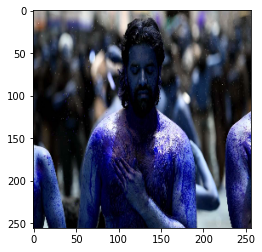

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 130ms/step


In [ ]:
yhat

array([[0.9796587]], dtype=float32)

In [ ]:
if yhat > 0.5: 
    print(f'Predicted class is non safe')
else:
    print(f'Predicted class is safe')

Predicted class is non safe


# Implementing the model

In [ ]:
uploaded = files.upload()

Saving images46.jpg to images46.jpg


1/1 [==============================] - 0s 40ms/step
[[0.49740407]]
safe


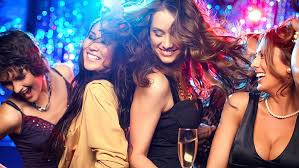

In [ ]:
uploaded = list(uploaded.keys())[0]
Image(uploaded)
img = cv2.imread(uploaded)

resize = tf.image.resize(img, (256,256))

yhat = model.predict(np.expand_dims(resize/255, 0))
print(yhat)
if yhat > 0.5:
  print("not safe image")
  blur = cv2.blur(img, (100, 100))
  cv2_imshow(blur)
else:
  print("safe") 
  cv2_imshow(img)